In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.src.utils import np_utils
from sklearn.model_selection import KFold

In [3]:
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img 
from keras.preprocessing import image_dataset_from_directory 
import os
import matplotlib.image as mpimg
from keras.applications import DenseNet121
from keras import layers

In [4]:
import cv2

In [5]:
# LOAD THE DATATSET

train_path = R'test'
test_path = R'train'

# DATA AGUMENTATION FOR TRAINING - PREPROCESSING

size_images = 200
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1.0/255,                # Rescale pixel values to [0, 1] => improve the CONVERGENCE and STABILITY for training process.
    rotation_range=20,              # Random rotation within 20 degrees
    width_shift_range=0.2,          # Random horizontal shift by 20% of image width
    height_shift_range=0.2,         # Random vertical shift by 20% of image height
    horizontal_flip=True,           # Random horizontal flipping
    fill_mode='nearest'             # Fill mode for new pixels after shifts/rotations (the new pixels will be filled with values from the nearest existing pixels)
)

train_generator = train_datagen.flow_from_directory(
    train_path,                      # Path to the training data, expected to have subdirectories representing different classes
    target_size=(size_images, size_images),  # Resize images to this size
    batch_size=batch_size,           # Number of images in each batch ##### Batch là 1 tập hợp các dữ liệu training sẽ cùng đc process during 1 interation  
    seed=32,                         # Optional: Set a random seed for shuffling
    shuffle=True,                    # Shuffle the data during training
    class_mode='categorical'         # Mode for class labels (categorical for one-hot encoding)
)

# return train_generator 
# ouput : Found 140 images belonging to 2 classes. 
# It means the training dataset contains a total of 140 images, and these images have been categorized into 2 classes : "cats" and "dogs"

Found 140 images belonging to 2 classes.


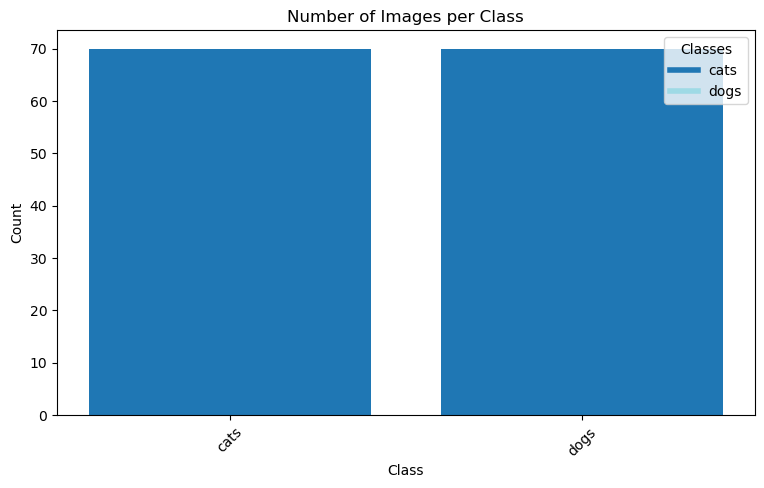

In [6]:
# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(train_generator)):
    batch_data, batch_labels = train_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(9, 5))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

In [7]:
# data augmentation for testing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale pixel values to [0, 1]

In [8]:
# Create a generator for testing data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(size_images, size_images),
    batch_size = batch_size,
    class_mode='categorical')

Found 557 images belonging to 2 classes.


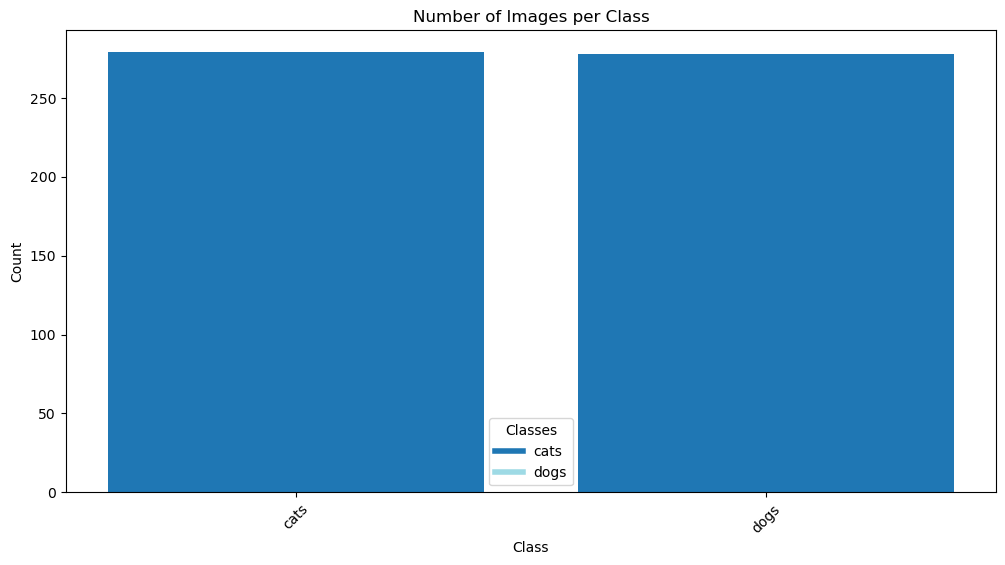

In [9]:
# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate the count of images per class
class_counts = {label: 0 for label in class_labels}

for i in range(len(test_generator)):
    batch_data, batch_labels = test_generator[i]
    for j in range(len(batch_data)):
        class_idx = int(batch_labels[j].argmax())
        class_label = class_labels[class_idx]
        class_counts[class_label] += 1

# Define unique colors for each class
class_colors = plt.cm.tab20(np.linspace(0, 1, len(class_labels)))

# Create a bar chart with different colors for each class
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)

# Add a legend for class colors
legend_labels = [plt.Line2D([0], [0], color=class_colors[i], lw=4, label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=legend_labels, title="Classes")

plt.show()

In [10]:
def Show_Images(target_gen):
    # Get a batch of images and labels
    batch_images, batch_labels = next(target_gen)

    # Get class labels
    class_labels = list(target_gen.class_indices.keys())

    # Display images with labels
    plt.figure(figsize=(20, 20))
    for n , i in enumerate(list(np.random.randint(0,len(batch_images),36))):
        plt.subplot(6, 6, n + 1)
        plt.imshow(batch_images[i])
        plt.title(class_labels[np.argmax(batch_labels[i])])  # Display the class label
        plt.axis('off')
    plt.show()

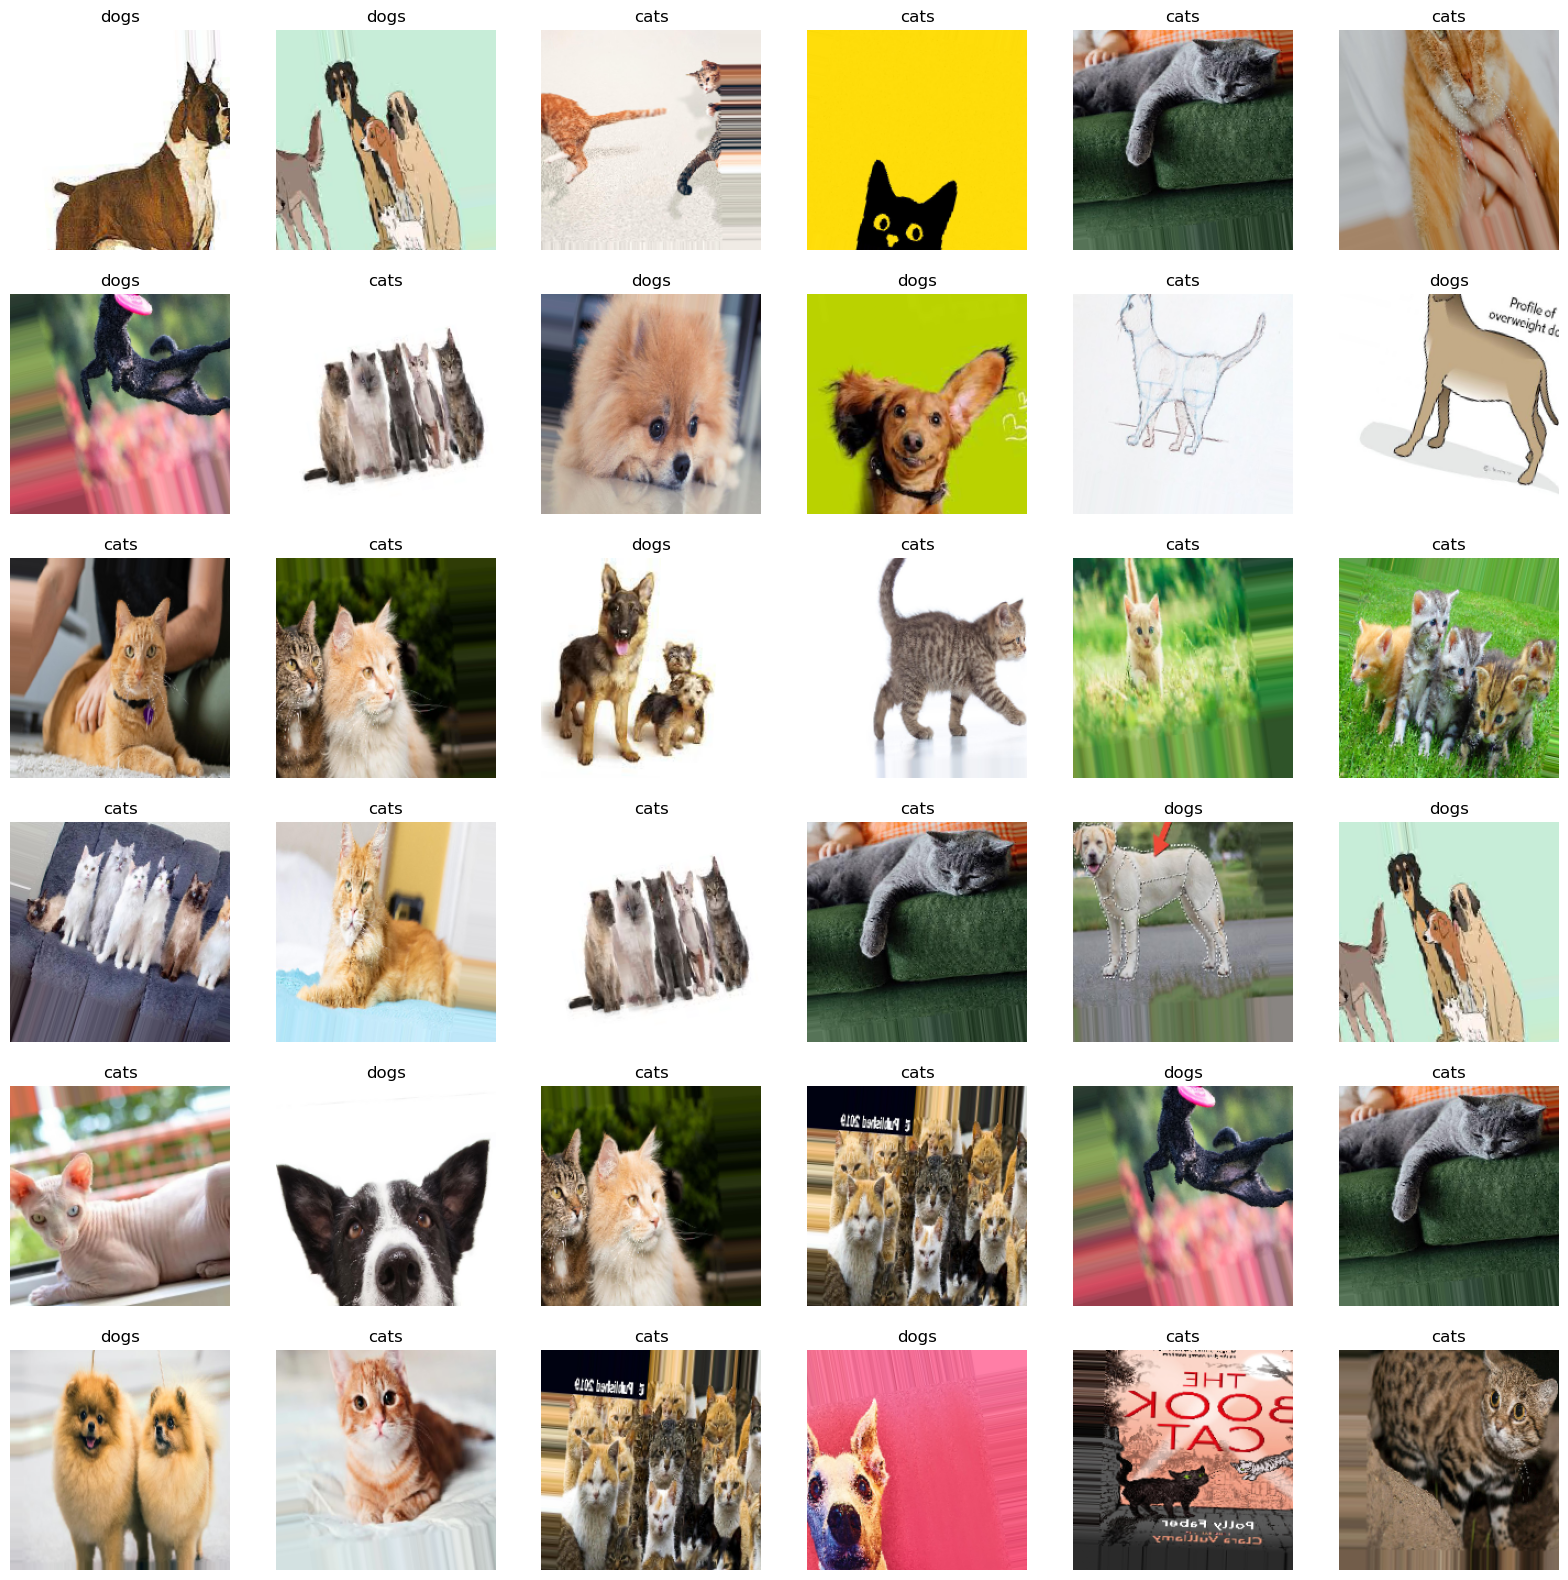

In [11]:
Show_Images(train_generator)

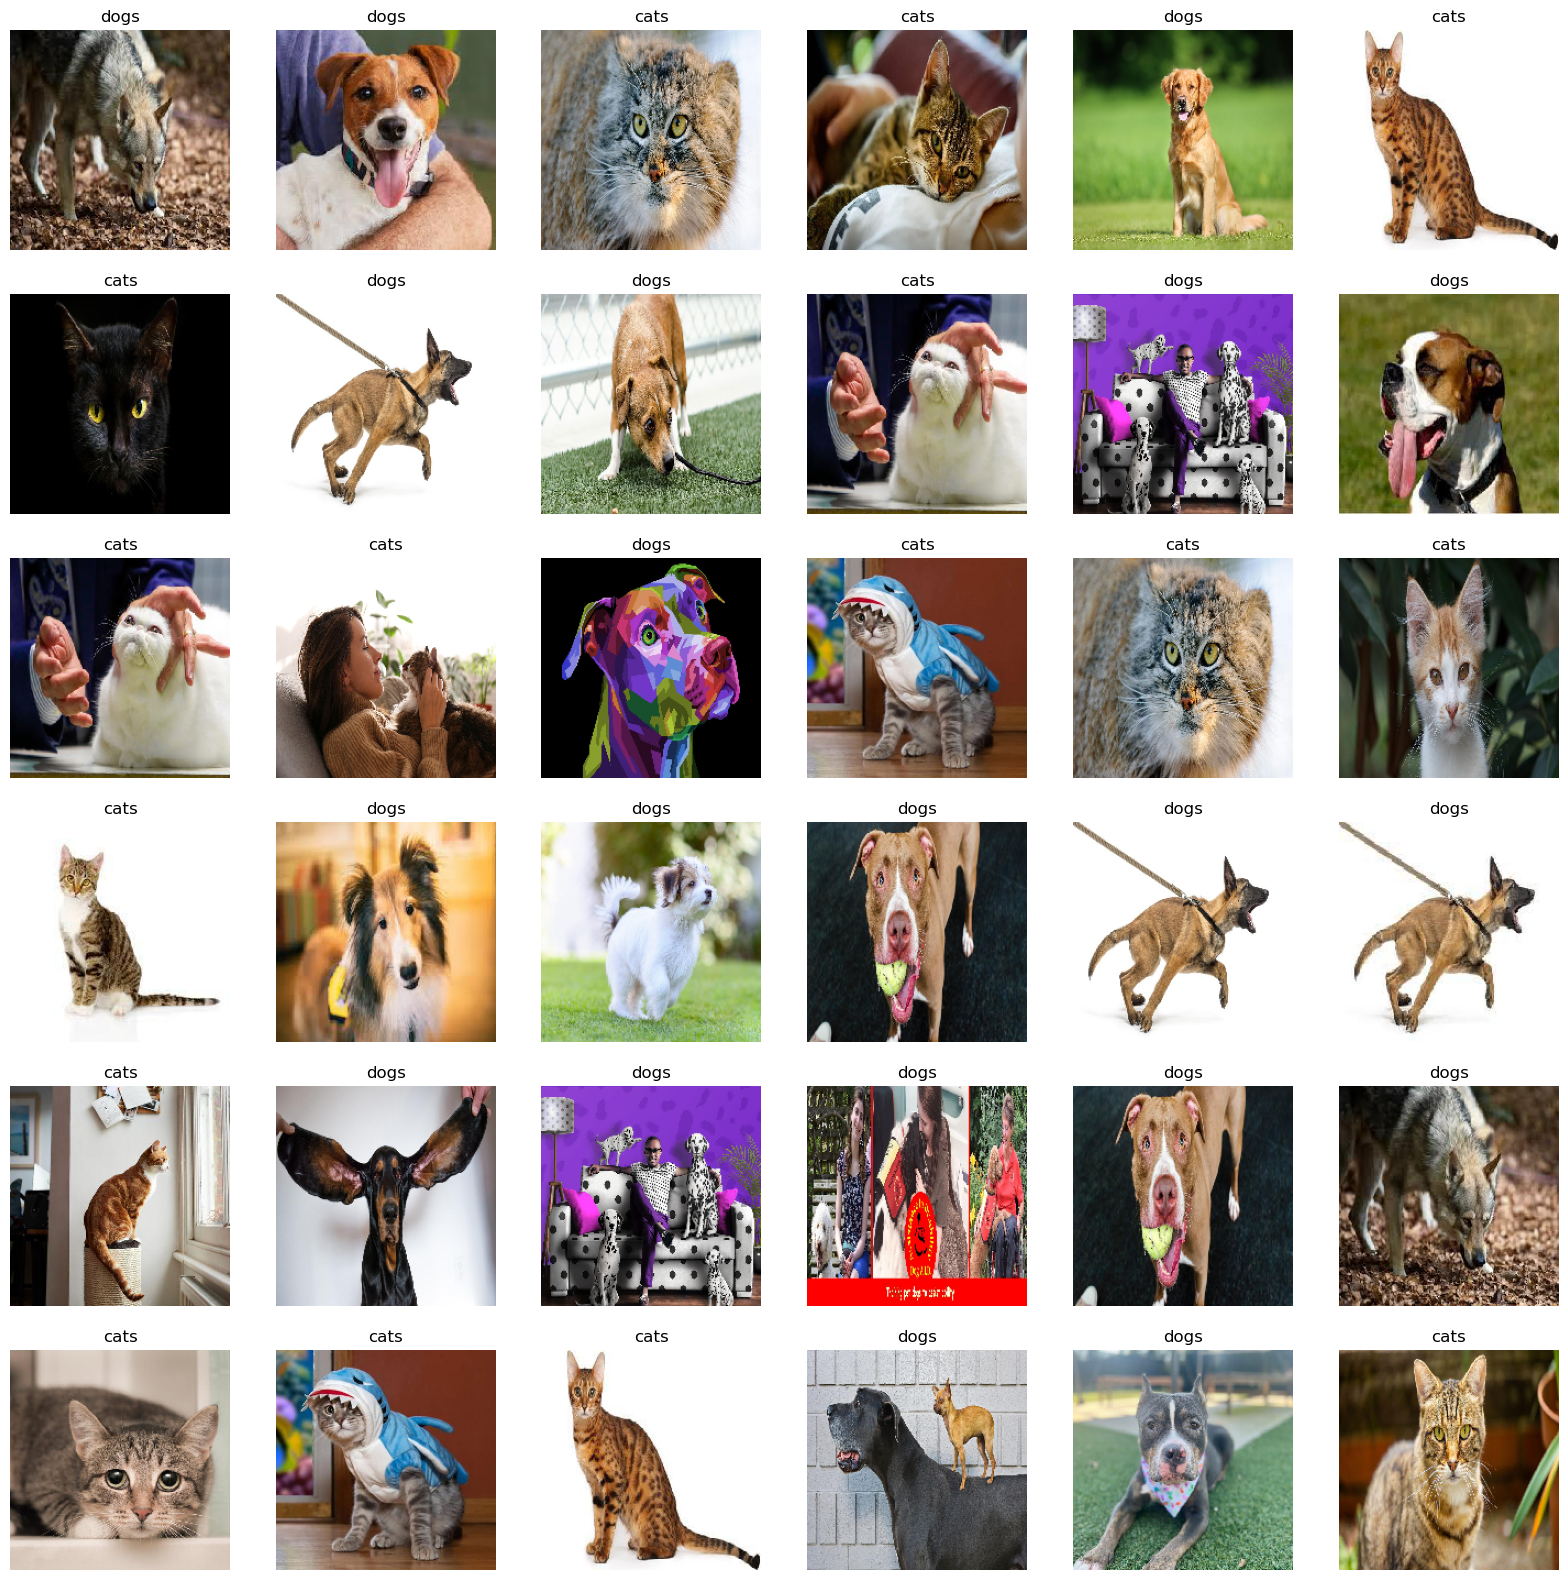

In [12]:
Show_Images(test_generator)

In [13]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(size_images, size_images, 3))


In [14]:
model = tf.keras.models.Sequential([
    base_model,
    
    layers.Flatten(),
    
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2,activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 256)               9437440   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

In [20]:

# K - FOLD ----------------------------------------- DONT TOUCH !!!!!!! ------------------------------------------------

# # Define the number of folds
# k = 5

# # Create the K-fold object
# kf = KFold(n_splits=k, shuffle=True)

# # Initialize a list to store the evaluation scores
# scores = []

# # Convert the generators to numpy arrays
# X_train = np.array(train_generator[0][0])
# y_train = np.array(train_generator[0][1])

# # Perform K-fold cross-validation
# for train_index, test_index in kf.split(X_train):
#     # Split the data into train and validation sets for this fold
#     X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    
#     # MODEL ARCHITECTURE
#     model = Sequential()

# # Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# # dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
#     model.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(size_images,size_images,3),groups=1))

# # Thêm Convolution layer 
#     model.add(Conv2D(32,(3,3),activation='sigmoid'))
# # fix : ,input_shape=model.layers[0].output_shape[1:]

# # Thêm max pooling vào layer 
# # Purpose : reduce the spatial dimensions of the feature maps generated by the convolutional layer while retaining the most important features
#     model.add(MaxPooling2D(pool_size=(2,2)))

# # Flatten layer chuyển từ tensor sang vector
#     model.add(Flatten())

# # Them Fully Connected layer với 128 nodes và dùng hàm sigmoid
#     model.add(Dense(128,activation='sigmoid'))

# # Ouput layer với 10 nodes và dùng softmax để chuyển sang xác suất 
#     model.add(Dense(len(class_labels),activation='softmax'))


# # COMPILE MODEL, CHOOSE LOSS_FUNCTION, OPTIMIZE LOSS FUNCTION
#     model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # TRAIN MODEL
#     H = model.fit(train_generator,validation_data = test_generator,batch_size=32,epochs=10,verbose=1)

# # Replace with your model creation code
    
#     # Compile the model
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
#     # Train the model on this fold
#     model.fit(X_train_fold, y_train_fold, batch_size=32, epochs=10, verbose=1)
    
#     # Evaluate the model on the validation data for this fold
#     score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    
#     # Add the score to the list of scores
#     scores.append(score)

# # Calculate the average score across all folds
# avg_loss = np.mean([score[0] for score in scores])
# avg_accuracy = np.mean([score[1] for score in scores])

# print("Average Loss:", avg_loss)
# print("Average Accuracy:", avg_accuracy)